📊 Libraries loaded!
📋 Dataset shape: (541, 6)
📋 Columns: ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']...
🎯 Target column: PCOS (Y/N)

📊 Class Distribution:
   Class 0: 364 (67.3%)
   Class 1: 177 (32.7%)

⚖️ Imbalance ratio: 2.1:1
✅ Class distribution is reasonable.


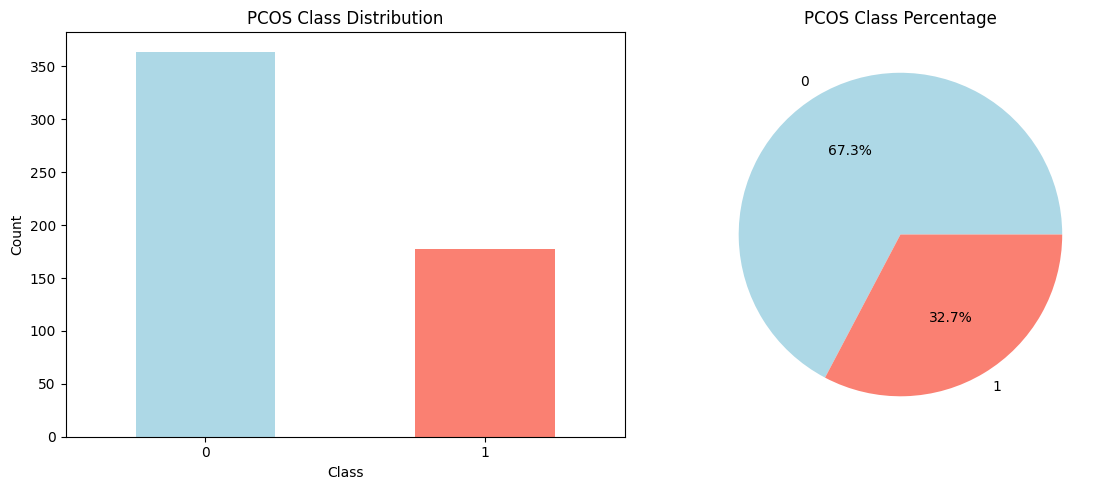

🔗 Feature Correlations with PCOS:

📈 Top 10 Most Correlated Features:
    1. Sl. No: 0.0610
    2. Patient File No.: 0.0610
    3.   I   beta-HCG(mIU/mL): 0.0276
    4. II    beta-HCG(mIU/mL): 0.0128

⚠️ WEAK CORRELATIONS! Max: 0.0610
💡 Solution: Need better features or more data
🤖 Testing current model...

🧪 Model Response Test:
   All zeros: 87.3% PCOS risk
   All ones: 87.3% PCOS risk
   High values: 20.0% PCOS risk
   Random: 87.3% PCOS risk

⚠️ MODEL GIVES SAME PREDICTIONS!
🔧 Need to retrain with better method

💡 DIAGNOSIS COMPLETE!

🎯 Next Steps:
1. If class imbalance > 4:1 → Use SMOTE or class weights
2. If max correlation < 0.15 → Better feature engineering
3. If model same predictions → Problem in ML pipeline
4. Update all scripts to use 'PCOS_infertility.csv'
5. Retrain model with fixes


In [1]:
# Cell 1 - Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

print("📊 Libraries loaded!")

# Cell 2 - Load Data (CORRECT FILE NAME)
df = pd.read_csv('../data/processed/PCOS_infertility.csv')

print(f"📋 Dataset shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)[:10]}...")  # Show first 10 columns
df.head()

# Cell 3 - Find Target and Check Distribution
# Find PCOS column
target_col = None
for col in df.columns:
    if 'PCOS' in col.upper():
        target_col = col
        break

if target_col is None:
    print("❌ No PCOS column found! Available columns:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
else:
    print(f"🎯 Target column: {target_col}")
    
    # Class distribution
    class_counts = df[target_col].value_counts()
    class_percentages = df[target_col].value_counts(normalize=True) * 100
    
    print(f"\n📊 Class Distribution:")
    for class_val, count in class_counts.items():
        percentage = class_percentages[class_val]
        print(f"   Class {class_val}: {count} ({percentage:.1f}%)")
    
    # Check imbalance
    imbalance_ratio = max(class_counts) / min(class_counts)
    print(f"\n⚖️ Imbalance ratio: {imbalance_ratio:.1f}:1")
    
    if imbalance_ratio > 4:
        print("⚠️ SEVERE CLASS IMBALANCE! This explains same predictions.")
        print("💡 Solution: Use class weights or SMOTE")
    else:
        print("✅ Class distribution is reasonable.")

# Cell 4 - Visualize Distribution
if target_col:
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Bar chart
    plt.subplot(1, 2, 1)
    class_counts.plot(kind='bar', color=['lightblue', 'salmon'])
    plt.title('PCOS Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Subplot 2: Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
            colors=['lightblue', 'salmon'])
    plt.title('PCOS Class Percentage')
    
    plt.tight_layout()
    plt.show()

# Cell 5 - Check Feature Correlations
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = []

print("🔗 Feature Correlations with PCOS:")
for col in numeric_cols:
    if col != target_col and target_col is not None:
        corr = abs(df[col].corr(df[target_col]))
        if not np.isnan(corr):
            correlations.append((col, corr))

# Sort by strength
correlations.sort(key=lambda x: x[1], reverse=True)

print(f"\n📈 Top 10 Most Correlated Features:")
for i, (feature, corr) in enumerate(correlations[:10], 1):
    print(f"   {i:2d}. {feature}: {corr:.4f}")

# Check if correlations are weak
if correlations:
    max_corr = correlations[0][1]
    if max_corr < 0.15:
        print(f"\n⚠️ WEAK CORRELATIONS! Max: {max_corr:.4f}")
        print("💡 Solution: Need better features or more data")
    else:
        print(f"\n✅ Good correlations found. Max: {max_corr:.4f}")

# Cell 6 - Test Current Model (if exists)
import os

model_dir = '../models'
if os.path.exists(os.path.join(model_dir, 'pcos_model.joblib')):
    import joblib
    
    print("🤖 Testing current model...")
    
    try:
        model = joblib.load(os.path.join(model_dir, 'pcos_model.joblib'))
        scaler = joblib.load(os.path.join(model_dir, 'pcos_scaler.joblib'))
        feature_names = joblib.load(os.path.join(model_dir, 'feature_names.joblib'))
        
        # Test with different inputs
        test_cases = {
            'All zeros': np.zeros(len(feature_names)),
            'All ones': np.ones(len(feature_names)),
            'High values': np.ones(len(feature_names)) * 50,
            'Random': np.random.rand(len(feature_names)) * 10
        }
        
        print("\n🧪 Model Response Test:")
        results = []
        for name, test_vector in test_cases.items():
            test_scaled = scaler.transform(test_vector.reshape(1, -1))
            pred_proba = model.predict_proba(test_scaled)[0]
            risk_score = pred_proba[1] * 100
            results.append(risk_score)
            print(f"   {name}: {risk_score:.1f}% PCOS risk")
        
        # Check variation
        if len(set([round(r, 0) for r in results])) <= 2:
            print("\n⚠️ MODEL GIVES SAME PREDICTIONS!")
            print("🔧 Need to retrain with better method")
        else:
            print("\n✅ Model shows good variation")
            
    except Exception as e:
        print(f"❌ Error testing model: {e}")
else:
    print("❌ No model found. Train first!")

# Cell 7 - Recommendations
print("\n💡 DIAGNOSIS COMPLETE!")
print("\n🎯 Next Steps:")
print("1. If class imbalance > 4:1 → Use SMOTE or class weights")  
print("2. If max correlation < 0.15 → Better feature engineering")
print("3. If model same predictions → Problem in ML pipeline")
print("4. Update all scripts to use 'PCOS_infertility.csv'")
print("5. Retrain model with fixes")
